In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
df=pd.read_csv('indian_liver_patient.csv')

In [168]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [169]:
df['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [170]:
df.shape

(583, 11)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [172]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [173]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [174]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [175]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

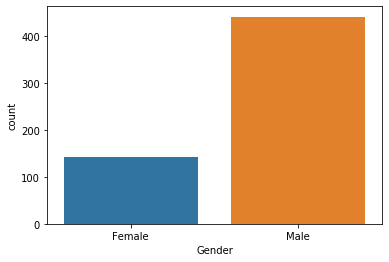

In [176]:
sns.countplot(data=df, x = 'Gender', label='Count')

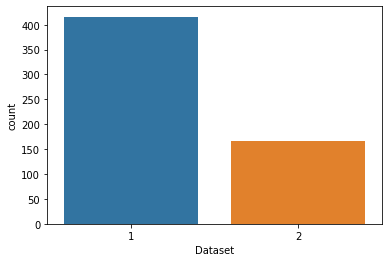

In [177]:
sns.countplot(data=df, x = 'Dataset', label='Count')

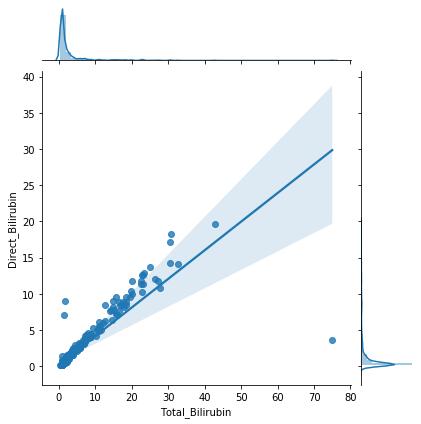

In [178]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

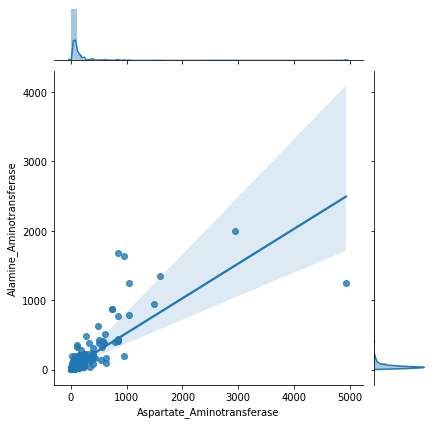

In [179]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

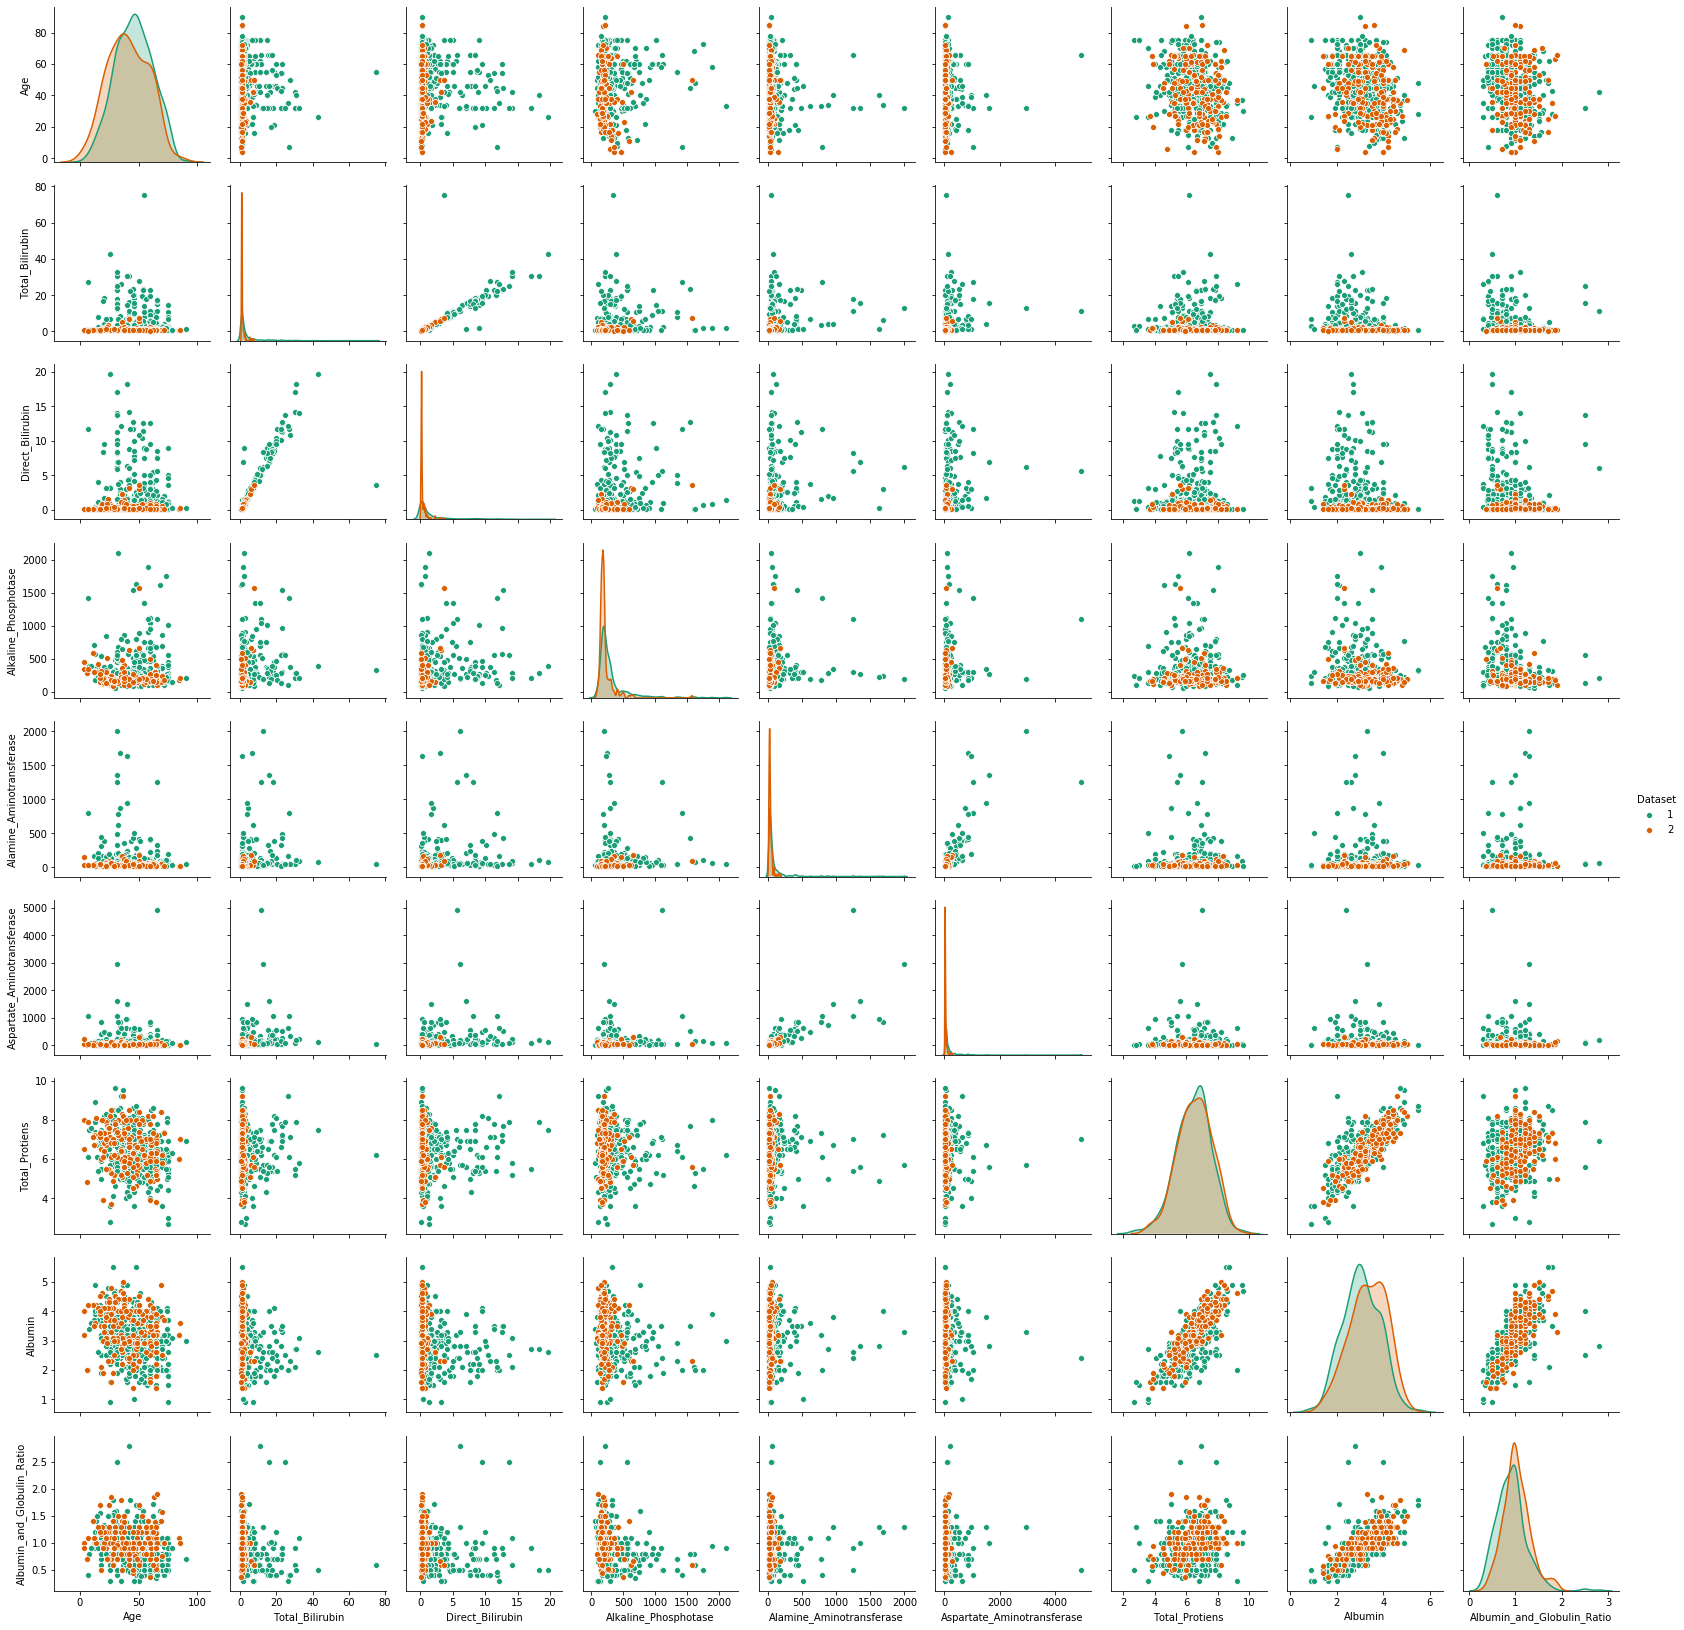

In [180]:
sns.pairplot(data=df,hue='Dataset',palette="Dark2")

In [181]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [182]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)

In [183]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [184]:
df.drop(['Gender'],axis=1)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [185]:
X = df.drop(['Gender','Dataset'], axis=1)

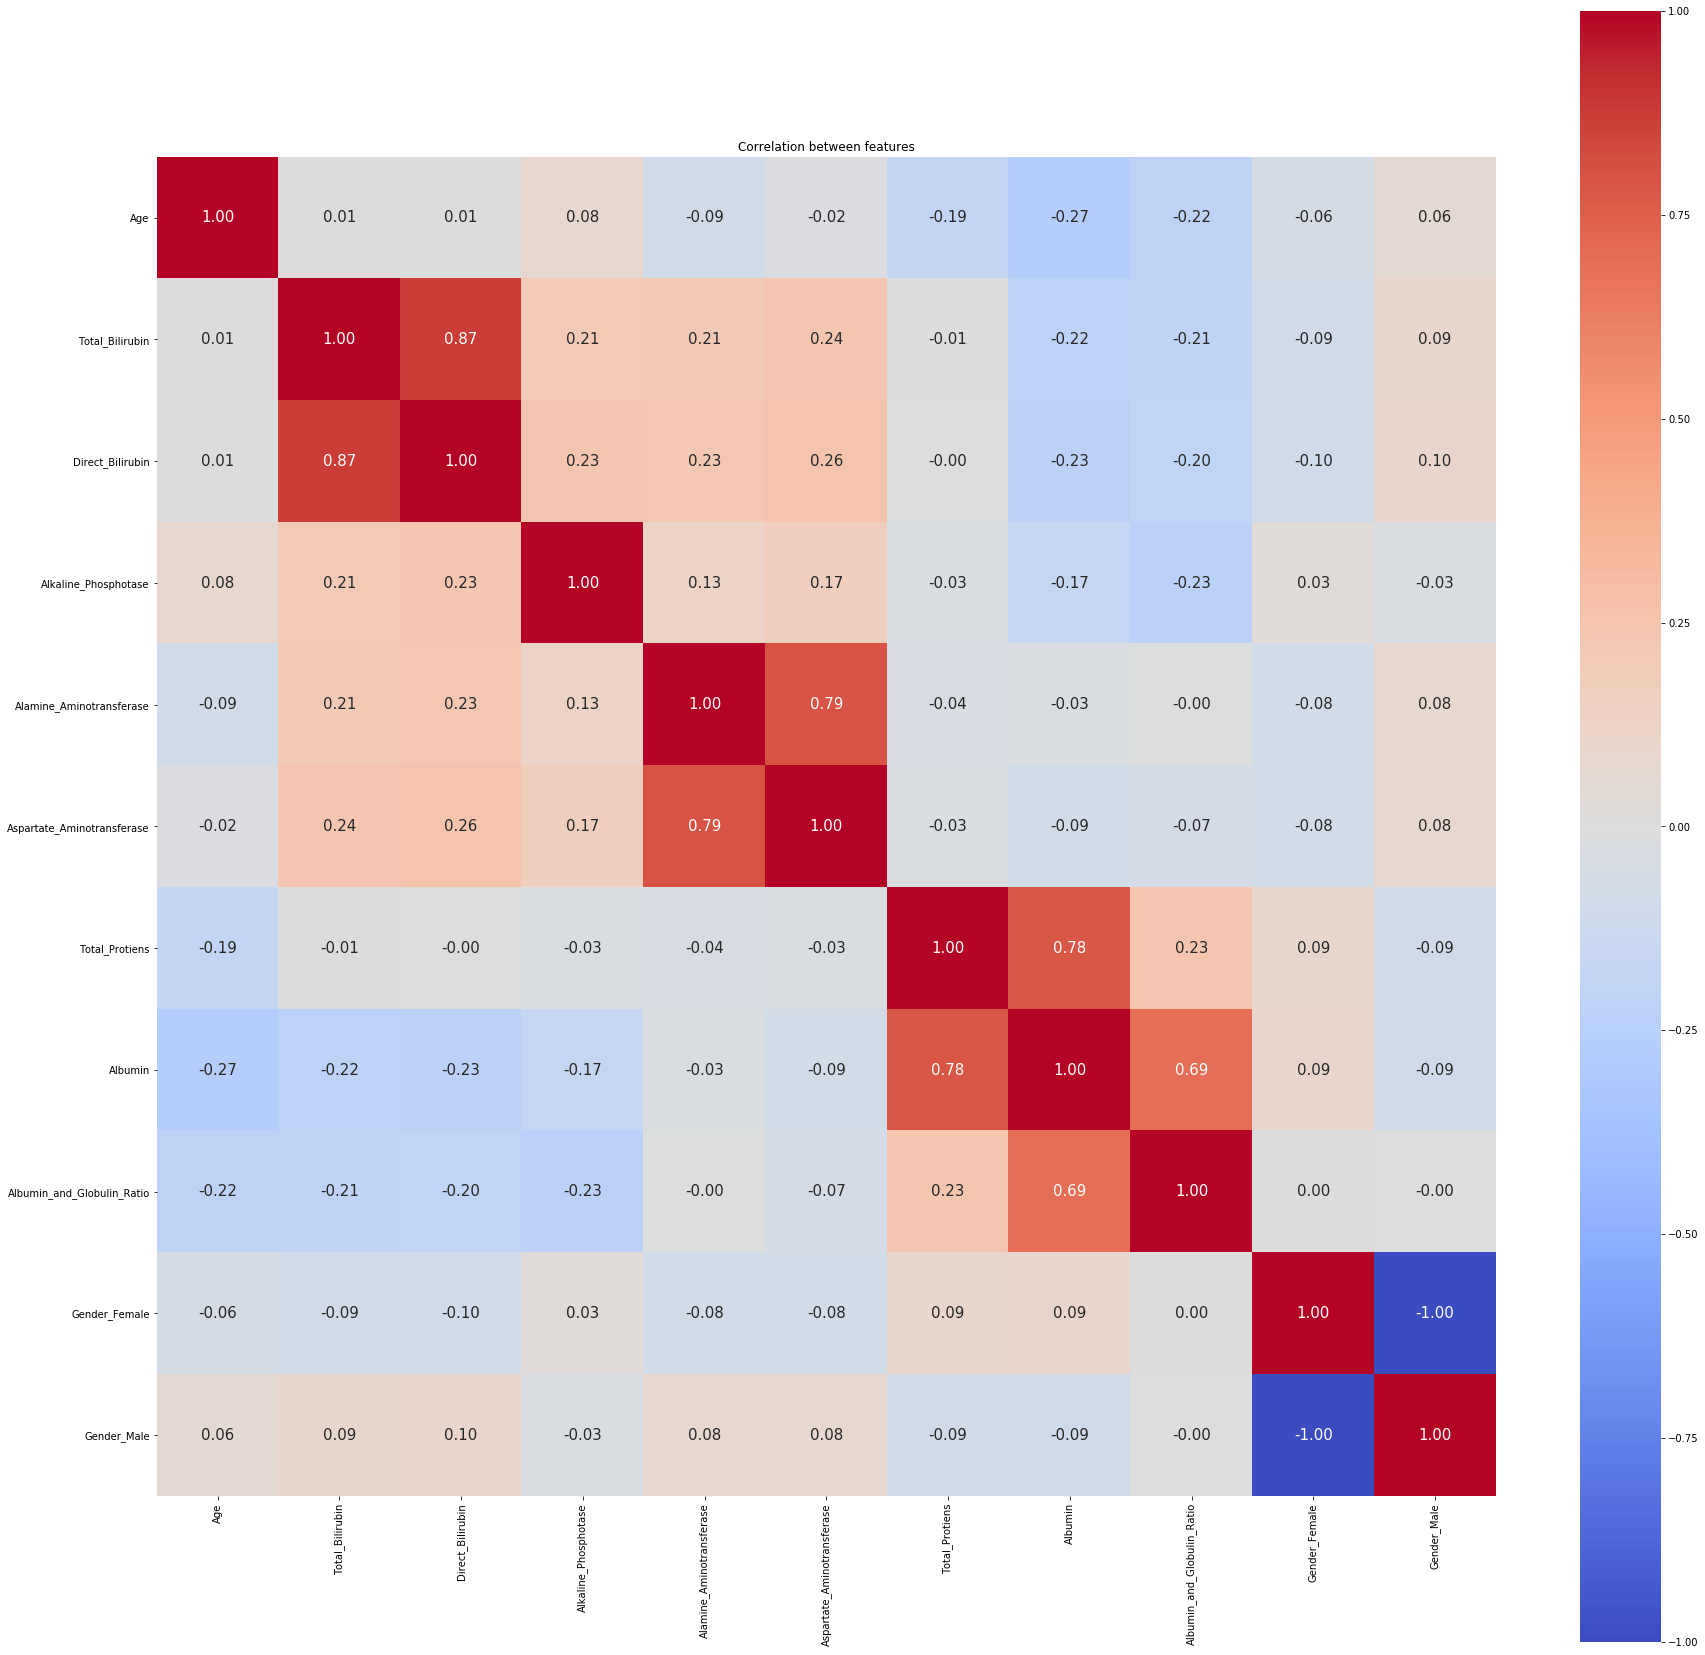

In [186]:
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [187]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [188]:
df.dropna(inplace=True)

In [189]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
 11  Gender_Female               579 non-null    uint8  
 12  Gender_Male                 579 non-null    uint8  
dtypes: float64(5), int64(5), object(1),

In [191]:
df.shape

(579, 13)

In [192]:
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [193]:
X = df.drop(['Gender','Dataset','Gender_Female','Gender_Male'], axis=1)

In [194]:
X=X[:].astype('int64')

In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         579 non-null    int64
 1   Total_Bilirubin             579 non-null    int64
 2   Direct_Bilirubin            579 non-null    int64
 3   Alkaline_Phosphotase        579 non-null    int64
 4   Alamine_Aminotransferase    579 non-null    int64
 5   Aspartate_Aminotransferase  579 non-null    int64
 6   Total_Protiens              579 non-null    int64
 7   Albumin                     579 non-null    int64
 8   Albumin_and_Globulin_Ratio  579 non-null    int64
dtypes: int64(9)
memory usage: 45.2 KB


In [196]:
X.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [197]:
Y=df['Dataset']

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [200]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [201]:
X_train_scaled=X_train_scaled.astype('int64')

In [202]:
X_train_scaled.dtype

dtype('int64')

In [203]:
X_train_scaled[0]

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0], dtype=int64)

In [204]:
y_train

38     1
434    2
290    1
403    2
91     1
      ..
397    1
75     2
579    1
341    1
527    1
Name: Dataset, Length: 405, dtype: int64

# LOGISTIC REGRESSION

In [247]:
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression()



In [248]:
modellr.fit(X_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [249]:
y_predict = modellr.predict(X_test)
model_score = modellr.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7413793103448276
[[117   7]
 [ 38  12]]


In [250]:
import pickle
filename='model12.sav'
pickle.dump(modellr,open(filename,'wb'))


In [251]:
load_model=pickle.load(open(filename,'rb'))

In [252]:
accuracy=load_model.score(X_test,y_test)

In [253]:
accuracy

0.7413793103448276

In [254]:
nb_predict = modellr.predict(np.array([38,1.0,0.3,216,21,24,7.3,4.4,1.50]).reshape(1,-1))

In [255]:
nb_predict

array([2], dtype=int64)

# DECISION TREE

In [209]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [210]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [211]:
predict = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print(dt_score)
print(metrics.confusion_matrix(y_test, predict))

0.6781609195402298
[[98 26]
 [30 20]]


In [212]:
print(classification_report(y_test,predict))
print(end="")
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78       124
           2       0.43      0.40      0.42        50

    accuracy                           0.68       174
   macro avg       0.60      0.60      0.60       174
weighted avg       0.67      0.68      0.67       174

[[98 26]
 [30 20]]


# RANDOM FOREST

In [213]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
rfc_predict = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
print(rfc_score)
print(metrics.confusion_matrix(y_test, rfc_predict))

0.7183908045977011
[[107  17]
 [ 32  18]]


In [215]:
print(classification_report(y_test,rfc_predict))
print(end="")
print(confusion_matrix(y_test,rfc_predict))

              precision    recall  f1-score   support

           1       0.77      0.86      0.81       124
           2       0.51      0.36      0.42        50

    accuracy                           0.72       174
   macro avg       0.64      0.61      0.62       174
weighted avg       0.70      0.72      0.70       174

[[107  17]
 [ 32  18]]


# SUPER VECTOR MACHINE

In [216]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [217]:
svc_predict = svc_model.predict(X_test)
svc_score = svc_model.score(X_test, y_test)
print(svc_score)
print(metrics.confusion_matrix(y_test, svc_predict))

0.7126436781609196
[[124   0]
 [ 50   0]]


In [218]:
print(classification_report(y_test,svc_predict))
print(end="")
print(confusion_matrix(y_test,svc_predict))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       124
           2       0.00      0.00      0.00        50

    accuracy                           0.71       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.51      0.71      0.59       174

[[124   0]
 [ 50   0]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [219]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=43 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='distance')

In [220]:
KNN_predict = NNH.predict(X_test)
KNN_score = NNH.score(X_test, y_test)
print(KNN_score)
print(metrics.confusion_matrix(y_test, KNN_predict))

0.7126436781609196
[[124   0]
 [ 50   0]]


In [221]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 43


In [222]:
print(classification_report(y_test,KNN_predict))
print(end="")
print(confusion_matrix(y_test,KNN_predict))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83       124
           2       0.00      0.00      0.00        50

    accuracy                           0.71       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.51      0.71      0.59       174

[[124   0]
 [ 50   0]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NAIVE BAEYES

In [223]:
from sklearn.naive_bayes import GaussianNB

In [224]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [225]:
nb_predict = model.predict(X_test)
nb_score = model.score(X_test, y_test)
print(nb_score)
print(metrics.confusion_matrix(y_test, nb_predict))

0.5632183908045977
[[51 73]
 [ 3 47]]


In [226]:
print(classification_report(y_test,nb_predict))
print(end="")
print(confusion_matrix(y_test,nb_predict))

              precision    recall  f1-score   support

           1       0.94      0.41      0.57       124
           2       0.39      0.94      0.55        50

    accuracy                           0.56       174
   macro avg       0.67      0.68      0.56       174
weighted avg       0.79      0.56      0.57       174

[[51 73]
 [ 3 47]]


In [227]:
import pickle
filename='modell.sav'
pickle.dump(model,open(filename,'wb'))



In [228]:
load_model=pickle.load(open(filename,'rb'))

In [229]:
accuracy=load_model.score(X_test_scaled,y_test)

In [230]:
accuracy

0.367816091954023

In [231]:
X_train


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
38,48,1,0,263,38,66,5,2,0
434,30,0,0,194,32,36,7,3,0
290,45,1,0,250,48,44,8,4,1
403,65,0,0,199,19,22,6,3,1
91,60,6,3,308,404,794,6,3,0
...,...,...,...,...,...,...,...,...,...
397,78,1,0,152,28,70,6,3,0
75,29,0,0,162,52,41,5,2,0
579,40,0,0,98,35,31,6,3,1
341,36,0,0,650,70,138,6,3,0


In [232]:
 y_train

38     1
434    2
290    1
403    2
91     1
      ..
397    1
75     2
579    1
341    1
527    1
Name: Dataset, Length: 405, dtype: int64

In [233]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [234]:
nb_predict = model.predict(np.array([38,1.0,0.3,216,21,24,7.3,4.4,1.50]).reshape(1,-1))

In [235]:
nb_predict

array([2], dtype=int64)

In [236]:
X_test

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
485,22,6,3,850,154,248,6,2,0
173,31,0,0,175,48,34,6,3,1
48,32,0,0,176,39,28,6,3,1
242,29,0,0,205,30,23,8,4,1
365,40,0,0,176,28,43,5,2,0
...,...,...,...,...,...,...,...,...,...
464,45,0,0,164,21,53,4,1,0
569,16,7,4,268,213,168,7,4,1
204,21,0,0,135,27,26,6,3,1
245,54,0,0,290,15,18,6,2,0


# BEST MODEL CHECK

In [237]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','DECISION TREE','SVM','KNN'],
    'Test Score': [ model_score, nb_score, rfc_score,dt_score,svc_score,KNN_score]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,Logistic Regression,0.741379
2,Random Forest,0.718391
4,SVM,0.712644
5,KNN,0.712644
3,DECISION TREE,0.678161
1,Gaussian Naive Bayes,0.563218
